In [14]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import yfinance as yf
import matplotlib.pyplot as plt
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math

In [16]:
df = yf.download("TSLA",start="2010-01-01", end="2023-05-31", progress=True)
df.head()
df.info()

[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3252 entries, 2010-06-29 to 2023-05-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3252 non-null   float64
 1   High       3252 non-null   float64
 2   Low        3252 non-null   float64
 3   Close      3252 non-null   float64
 4   Adj Close  3252 non-null   float64
 5   Volume     3252 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 177.8 KB


In [18]:
df = df.reset_index()

In [19]:
df.head()

Date      Open      High       Low     Close  Adj Close     Volume
0 2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
1 2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2 2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
4 2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500

In [21]:
df.shape

(3252, 7)

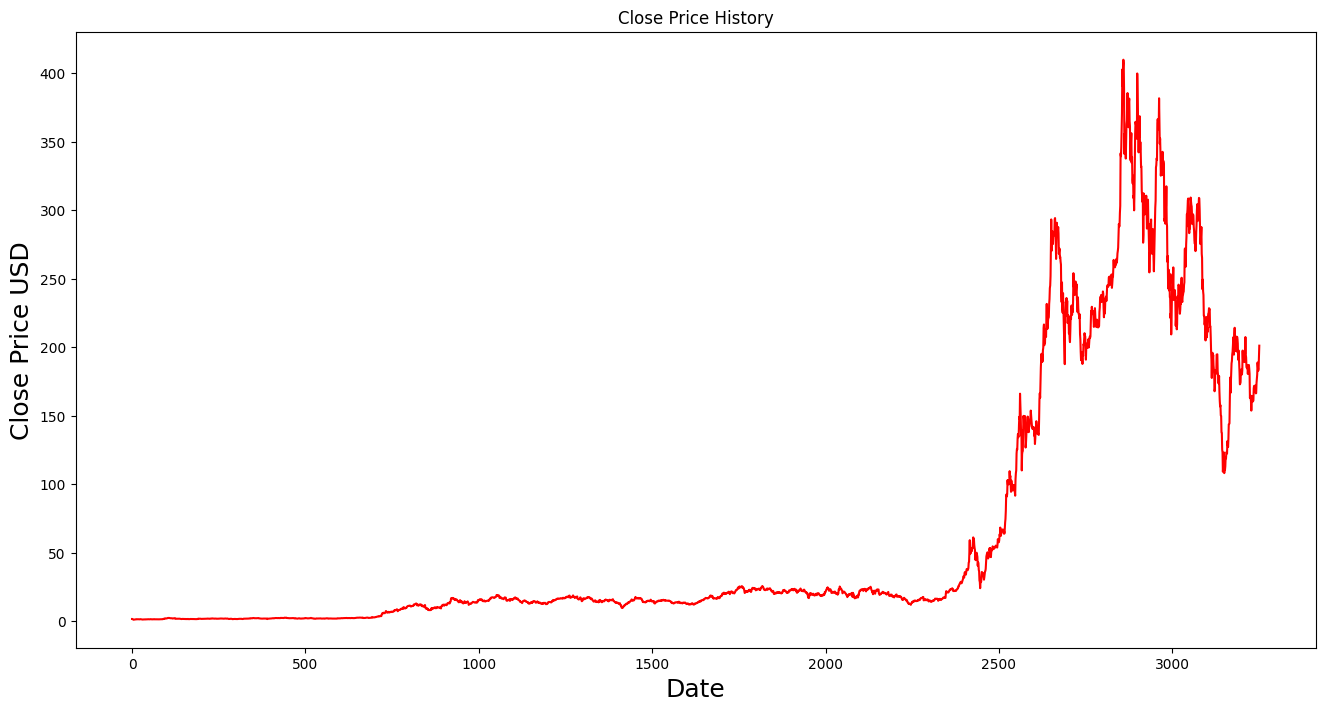

In [22]:
#plotting the data
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'], color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize = 18)
plt.show()

In [23]:
# create a new data frame with only 'Close column'
data = df.filter(['Close'])
dataset = data.values #convert the data frame to a numpy array
training_data_len = math.ceil(len(dataset)*.8)  # number of rows to train the model on
training_data_len

2602

In [24]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00131893],
       [0.00130915],
       [0.00100428],
       ...,
       [0.4485429 ],
       [0.46981862],
       [0.48935807]])

In [25]:
#create the training dataset
#create the scaled training dataset

train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train, y_train datasets
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([1.31893362e-03, 1.30915180e-03, 1.00428027e-03, 5.54310805e-04,
       5.05407544e-05, 0.00000000e+00, 2.70634579e-04, 2.60852469e-04,
       2.03792057e-04, 3.81495574e-04, 6.58652434e-04, 6.66803171e-04,
       7.89077648e-04, 9.96129534e-04, 7.33645693e-04, 7.20604046e-04,
       8.47769140e-04, 8.95047734e-04, 8.39618402e-04, 7.74404629e-04,
       8.02119295e-04, 7.41799054e-04, 6.74953909e-04, 8.34727493e-04,
       1.00264919e-03, 8.90156824e-04, 7.58100530e-04, 6.17893497e-04,
       6.19524578e-04, 5.26596139e-04, 3.42368009e-04, 2.93458335e-04,
       4.10841611e-04, 4.85837203e-04, 5.46160067e-04, 4.84206122e-04,
       4.87468283e-04, 5.38006705e-04, 7.05931027e-04, 5.54310805e-04,
       6.68434252e-04, 6.43979415e-04, 6.35826345e-04, 6.63543343e-04,
       5.99960650e-04, 7.58100530e-04, 8.57551250e-04, 8.55919878e-04,
       7.72773549e-04, 8.31465041e-04, 8.00490546e-04, 7.12453017e-04,
       8.02119295e-04, 8.67333068e-04, 1.00754010e-03, 8.37987322e-04,
     

In [26]:
#convert the x_train and y_train  to numppy array
x_train,y_train = np.array(x_train), np.array(y_train)

In [27]:
#reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2542, 60, 1)

In [28]:
#Buil the LSTM model
model =Sequential()
model.add(LSTM(64,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(32))
model.add(Dense(1))

In [29]:
#Complie the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [30]:
#Train the model
model.fit(x_train,y_train, batch_size=1, epochs=10)

Epoch 1/10
2542/2542 [==============================] - 57s 21ms/step - loss: 2.7583e-04
Epoch 2/10
2542/2542 [==============================] - 53s 21ms/step - loss: 2.2545e-04
Epoch 3/10
2542/2542 [==============================] - 56s 22ms/step - loss: 7.2416e-05
Epoch 4/10
2542/2542 [==============================] - 62s 24ms/step - loss: 1.2812e-04
Epoch 5/10
2542/2542 [==============================] - 56s 22ms/step - loss: 7.3928e-05
Epoch 6/10
2542/2542 [==============================] - 56s 22ms/step - loss: 5.6538e-05
Epoch 7/10
2542/2542 [==============================] - 49s 19ms/step - loss: 5.6067e-05
Epoch 8/10
2542/2542 [==============================] - 54s 21ms/step - loss: 7.8874e-05
Epoch 9/10
2542/2542 [==============================] - 61s 24ms/step - loss: 5.2667e-05
Epoch 10/10
2542/2542 [==============================] - 62s 24ms/step - loss: 4.2167e-05


In [32]:
model.save('keras_model.h5')

In [33]:
#create the testing data sets
#create a new array containing scale values from index 1543 to 2003
test_data= scaled_data[training_data_len-60:, :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [34]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [35]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(650, 60, 1)

In [36]:
#predicting the data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

21/21 [==============================] - 1s 20ms/step


In [37]:
#get the root mean square error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

21.066265200101412

C:\Users\Anuvab\AppData\Local\Temp\ipykernel_28932\1957929173.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


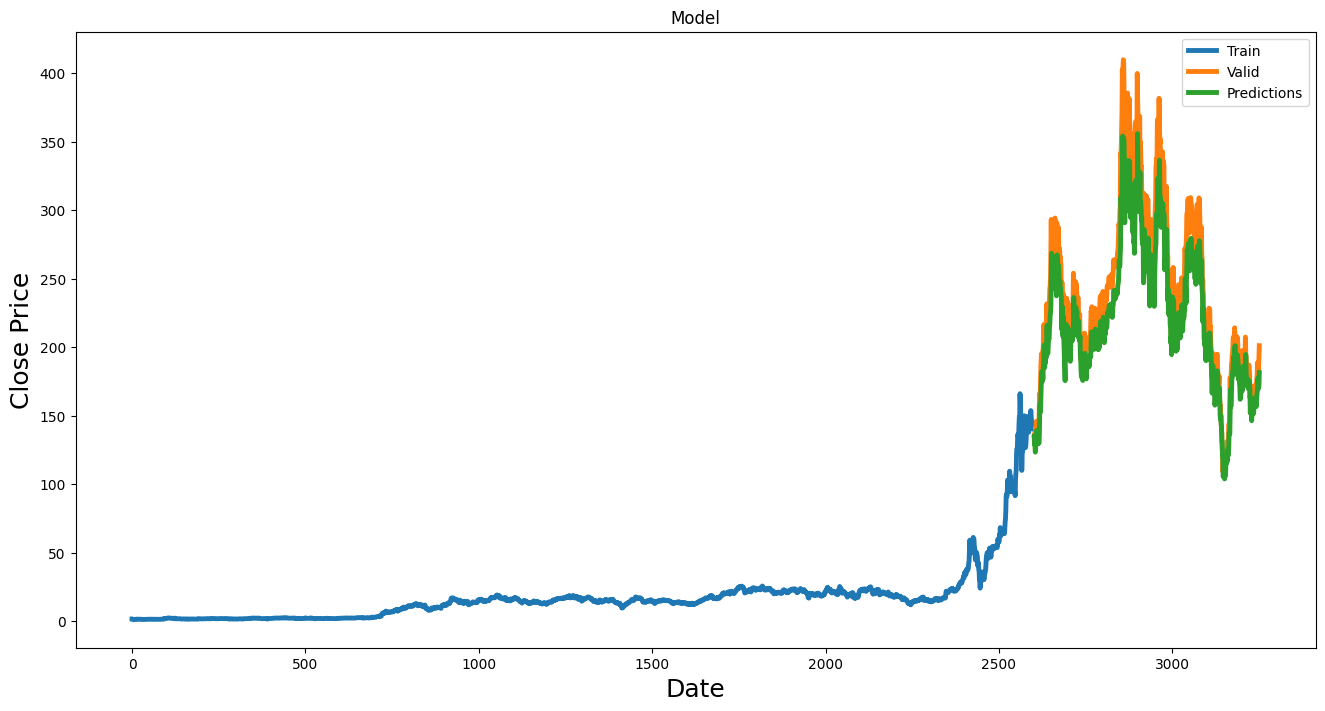

In [43]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visialization of the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price' ,fontsize=18)
plt.plot(train['Close'],linewidth=3.5)
plt.plot(valid[['Close','Predictions']],linewidth=3.5)
plt.legend(['Train','Valid','Predictions'], loc='best')

In [44]:
#show the valid and predicted price
valid

Close  Predictions
2602  135.339996   134.973343
2603  136.943329   128.834305
2604  129.346664   130.307266
2605  133.503326   123.403877
2606  141.300003   127.708733
...          ...          ...
3247  185.770004   177.441666
3248  182.899994   173.637421
3249  184.470001   170.052719
3250  193.169998   171.982010
3251  201.160004   181.520050

[650 rows x 2 columns]